# Week 1 Exercise 1.2- Group 2
**s232161-Xiaoyu Yan 25%**\
**s Marcel Zelent 25%**\
**s Linna Li 25%**\
**s Nicolaus 25%**

In [152]:
import numpy as np
from activation import ActivationFunction
import matplotlib.pyplot as plt

In [153]:
class Perceptron:
    """ 
      Perceptron neuron model
      Parameters
      ----------
      n_inputs : int
         Number of inputs
      act_f : Subclass of `ActivationFunction`
         Activation function
    """
    def __init__(self, n_inputs, act_f):
        """
         Perceptron class initialization
         TODO: Write the code to initialize weights and save the given activation function
        """
        if not isinstance(act_f, type) or not issubclass(act_f, ActivationFunction):
            raise TypeError('act_f has to be a subclass of ActivationFunction (not a class instance).')
        # weights
        np.random.seed(42)
        self.w = np.random.normal(0, 1, (n_inputs + 1,))#np.random.normal(mean, standard deviation, size)
        # activation function
        self.f = act_f()
        self.bias = 1

        if self.f is not None and not isinstance(self.f, ActivationFunction):
            raise TypeError("self.f should be a class instance.")

    def activation(self, x):
        """
         It computes the activation `a` given an input `x`
         TODO: Fill in the function to provide the correct output
         NB: Remember the bias
        """
        a = np.dot(self.w[1:].T, x) + self.bias*self.w[0]
        return a

    def output(self, a):
        """
         It computes the neuron output `y`, given the activation `a`
         TODO: Fill in the function to provide the correct output
        """
        y = self.f.forward(a)
        return y

    def predict(self, x):
        """
         It computes the neuron output `y`, given the input `x`
         TODO: Fill in the function to provide the correct output
        """
        a = self.activation(x)
        y_out = self.output(a)
        return y_out

    def gradient(self, a):
        """
         It computes the gradient of the activation function, given the activation `a`
        """
        return self.f.gradient(a)

### 1.2-1

In [154]:
class Sigmoid(ActivationFunction):
    """ 
      Sigmoid activation: `f(x) = 1/(1+e^(-x))`
    """
    def forward(self, x):
        return 1/(1+np.exp(-x))

    def gradient(self, x):
        return self.forward(x) * (1 - self.forward(x))

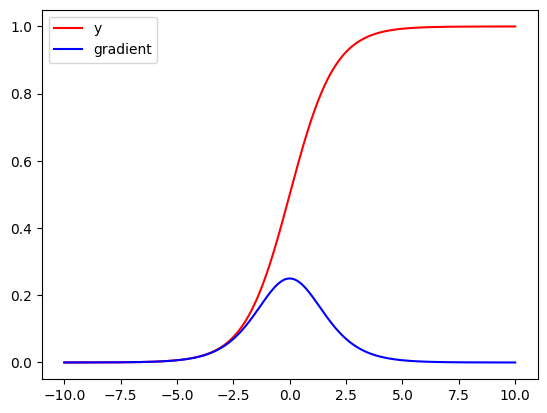

In [155]:
sig = Sigmoid()
x = np.linspace(-10, 10, 1000)
y = sig.forward(x)
g = sig.gradient(x)
fig, ax = plt.subplots()
ax.plot(x, y, color='red', label='y')
ax.plot(x, g, color='blue', label='gradient')
ax.legend()
plt.show()

In [156]:
class LinearActivation(ActivationFunction):
    """ 
      Linear activation: `f(x) = x`
    """
    def forward(self, x):
        return x

    def gradient(self, x):
        return 1

In [157]:
class Layer:
    def __init__(self, num_inputs, num_units, act_f):
        """ 
         Initialize the layer, creating `num_units` perceptrons with `num_inputs` each. 
        """
        # TODO Create the perceptrons required for the layer
        self.num_units = num_units
        self.ps = []
        for i in range(num_units):
            self.ps.append(Perceptron(num_inputs, act_f))

    def activation(self, x):
        """ Returns the activation `a` of all perceptrons in the layer, given the input vector`x`. """
        return np.array([p.activation(x) for p in self.ps])

    def output(self, a):
        """ Returns the output `o` of all perceptrons in the layer, given the activation vector `a`. """
        return np.array([p.output(ai) for p, ai in zip(self.ps, a)])

    def predict(self, x):
        """ Returns the output `o` of all perceptrons in the layer, given the input vector `x`. """
        return np.array([p.predict(x) for p in self.ps])

    def gradient(self, a):
        """ Returns the gradient of the activation function for all perceptrons in the layer, given the activation vector `a`. """
        return np.array([p.gradient(ai) for p, ai in zip(self.ps, a)])

    def update_weights(self, dw):
       """ 
       Update the weights of all of the perceptrons in the layer, given the weight change of each.
       Input size: (n_inputs+1, n_units)
       """
       for i in range(self.num_units):
          self.ps[i].w += dw[:,i]

    @property
    def w(self):
        """
         Returns the weights of the neurons in the layer.
         Size: (n_inputs+1, n_units)
        """
        return np.array([p.w for p in self.ps]).T

    def import_weights(self, w):
        """ 
         Import the weights of all of the perceptrons in the layer.
         Input size: (n_inputs+1, n_units)
        """
        for i in range(self.num_units):
           self.ps[i].w = w[:,i]

In [158]:
layer = Layer(2, 5, Sigmoid)
pre = layer.predict([np.pi, 1])
print(pre)
print(layer.w)

[0.67040836 0.67040836 0.67040836 0.67040836 0.67040836]
[[ 0.49671415  0.49671415  0.49671415  0.49671415  0.49671415]
 [-0.1382643  -0.1382643  -0.1382643  -0.1382643  -0.1382643 ]
 [ 0.64768854  0.64768854  0.64768854  0.64768854  0.64768854]]


### 1.2-3
5 inputs

In [232]:
class MLP:
    """ 
      Multi-layer perceptron class

    Parameters
    ----------
    n_inputs : int
       Number of inputs
    n_hidden_units : int
       Number of units in the hidden layer
    n_outputs : int
       Number of outputs
    alpha : float
       Learning rate used for gradient descent
    """
    def __init__(self, num_inputs, n_hidden_units, n_outputs, alpha=0.6):
       self.num_inputs = num_inputs
       self.n_hidden_units = n_hidden_units
       self.n_outputs = n_outputs

       self.alpha = alpha

       # TODO: Define a hidden layer and the output layer
       self.l1 = Layer(self.num_inputs, self.n_hidden_units, Sigmoid)# hidden layer 1
       self.l_out = Layer(self.n_hidden_units, self.n_outputs, LinearActivation) # output layer

    def predict(self, x):
        """ 
        Forward pass prediction given the input x
        TODO: Write the function
        """
        out1 = self.l1.predict(x)
        out2 = self.l_out.predict(out1)
        return out2

    def train(self, inputs, outputs):
        """
          Train the network 

        Parameters
        ----------
        `x` : numpy array
           Inputs (size: n_examples, n_inputs)
        `t` : numpy array
           Targets (size: n_examples, n_outputs)

        TODO: Write the function to iterate through training examples and apply gradient descent to update the neuron weights
        """
        # Loop over training examples
        dw1 = np.zeros_like(self.l1.w)
        dw_out = np.zeros_like(self.l_out.w)
        
        for x,t in zip(inputs, outputs):
            # Forward pass
            a1 = self.l1.activation(x)
            o1 = self.l1.output(a1)
            a_out = self.l_out.activation(o1)
            o_out = self.l_out.output(a_out)

            # Backpropagation
            delta_out = (o_out - t) * self.l_out.gradient(a_out)
            delta1 = self.l1.gradient(a1) * self.l_out.w[1:].dot(delta_out)

            # Add weight change contributions to temporary array
            o0 = np.insert(x, 0, 1)  # Add bias term
            o1 = np.insert(o1, 0, 1)  # Add bias term

            dw1 += delta1.reshape(-1, 1).dot(o0.reshape(1, -1)).T/x.shape[0]
            dw_out += np.outer(o1, delta_out)/x.shape[0]

               # Update weights
        self.l1.update_weights(-self.alpha * dw1)
        self.l_out.update_weights(-self.alpha * dw_out)

      
        return None # remove this line

    def export_weights(self):
        return [self.l1.w, self.l2.w]
   
    def import_weights(self, ws):
        if ws[0].shape == (self.l1.n_units, self.n_inputs+1) and ws[1].shape == (self.l2.n_units, self.l1.n_units+1):
            print("Importing weights..")
            self.l1.import_weights(ws[0])
            self.l2.import_weights(ws[1])
        else:
            print("Sizes do not match")

In [180]:
xdata = [np.pi, 1]
mlp = MLP(2, 3, 1)
print("predict results:", mlp.predict(xdata))
print("wieghts of hidden layer:")
print(mlp.l1.w)
print("wieghts of output layer:")
print(mlp.l_out.w)

predict results: [1.85928837]
wieghts of hidden layer:
[[ 0.49671415  0.49671415  0.49671415]
 [-0.1382643  -0.1382643  -0.1382643 ]
 [ 0.64768854  0.64768854  0.64768854]]
wieghts of output layer:
[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]
 [ 1.52302986]]


In [181]:
def calc_prediction_error(model, x, t):
    """
    Input:
    x: xdata input
    t: ground truth
    """
    y = []
    for i in range(x.shape[0]):
        y.append(model.predict(x[i, :]))
    n = t.shape[0]
    y = np.array(y).T[0]
    error = np.sum((y - t)**2) / n
    return error

In [182]:
data = np.array( [ [0.5, 0.5, 0], [1.0, 0, 0], [2.0, 3.0, 0], [0, 1.0, 1], [0, 2.0, 1], [1.0, 2.2, 1] ] )
xdata = data[:,:2]
ydata = data[:,2]
error = calc_prediction_error(mlp, xdata, ydata)
print(error)

2.652627395853172


In [183]:
data = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0]])
xdata = data[:, :2]
ydata = data[:, 2]
error = calc_prediction_error(mlp, xdata, ydata)
print(error)

2.149328068866513


In [249]:
xor = MLP(2, 2, 1)
error = []
for epoch in range(650):
    xor.train(xdata, ydata)
    error.append(calc_prediction_error(xor, xdata, ydata))
for i in range(4):
    print(xor.predict(xdata[i, :]))

[-0.01655973]
[0.9723402]
[0.97888777]
[-0.02165216]


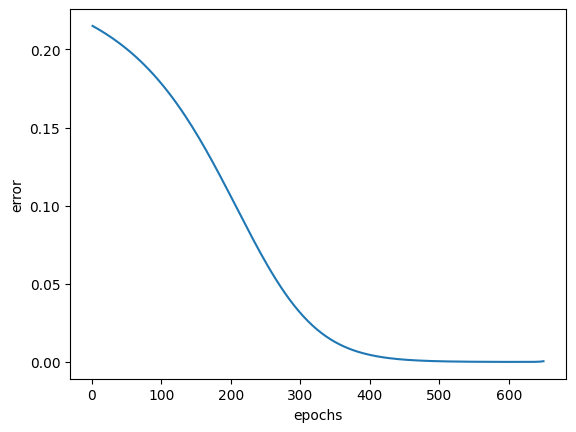

In [250]:
x = np.linspace(1, 650, 200)
plt.plot(x, error[450:])
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()